In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/ai_project/data/f10-7.pkl', 'rb') as f:
    df = pickle.load(f)

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25989 entries, 44 to 26032
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    25989 non-null  int64  
 1   value   25989 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 406.2 KB


In [ ]:
df.head()

,Date,value
44,19470305,306.10
45,19470306,306.00
46,19470307,321.40
47,19470308,345.60
48,19470309,335.75


<AxesSubplot:>

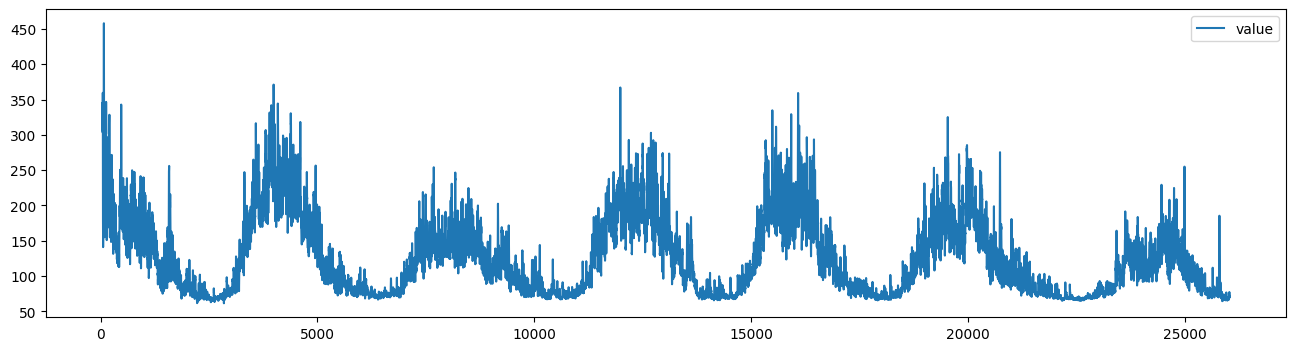

In [ ]:
df['value'].plot(figsize=(16,4),legend=True)

In [3]:
X = [df['value'].values[i:i+300] for i in range(len(df)-300)]

In [4]:
y = [df['value'].values[i+300] for i in range(len(df)-300)]

In [5]:
len(X), len(y)

(25689, 25689)

In [6]:
X[0].shape, y[0].shape

((300,), ())

In [7]:
X_test, y_test = X[-365:], y[-365:]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(np.array(X[:-365]), np.array(y[:-365]), test_size=0.2, random_state=42)

In [9]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((20259, 300), (20259,), (5065, 300), (5065,))

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [11]:
model1 = Sequential()
# model1.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model1.add(Dense(64, activation='relu', input_dim=X_train.shape[-1]))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(1))

model1.compile(loss='mse', optimizer='adam', metrics=['mae'])

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                19264     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21481 (83.91 KB)
Trainable params: 21481 (83.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    verbose=1)

Epoch 1/100
634/634 [==============================] - 2s 2ms/step - loss: 572.5197 - mae: 14.5708 - val_loss: 179.1565 - val_mae: 8.9441
Epoch 2/100
634/634 [==============================] - 1s 2ms/step - loss: 171.1530 - mae: 9.0139 - val_loss: 133.4851 - val_mae: 8.3527
Epoch 3/100
634/634 [==============================] - 1s 2ms/step - loss: 142.3349 - mae: 8.3324 - val_loss: 92.5667 - val_mae: 6.5581
Epoch 4/100
634/634 [==============================] - 1s 2ms/step - loss: 105.6290 - mae: 7.0868 - val_loss: 101.4703 - val_mae: 6.7446
Epoch 5/100
634/634 [==============================] - 1s 2ms/step - loss: 100.7810 - mae: 6.9298 - val_loss: 219.1799 - val_mae: 11.7992
Epoch 6/100
634/634 [==============================] - 1s 2ms/step - loss: 89.4611 - mae: 6.5685 - val_loss: 83.9501 - val_mae: 6.2149
Epoch 7/100
634/634 [==============================] - 1s 2ms/step - loss: 95.9140 - mae: 6.8500 - val_loss: 75.8920 - val_mae: 6.2840
Epoch 8/100
634/634 [=======================

In [ ]:
def plot_result(his):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(his.history['loss'])
    ax1.plot(his.history['val_loss'])
    ax1.set_title('Model Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper right')

    ax2.plot(his.history['mae'])
    ax2.plot(his.history['val_mae'])
    ax2.set_title('Model MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper right')

    plt.show()

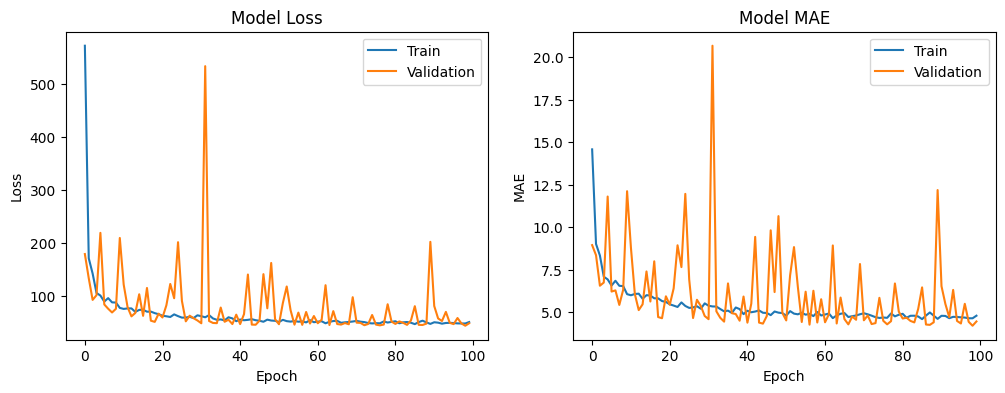

In [ ]:
plot_result(history1)

In [ ]:
def make_pred(num, model):
    data_pred = np.array(df['value'].values[:-365])
    for i in range(num):
        temp = data_pred[-300:]
        pred = model.predict(temp.reshape(1, -1))
        data_pred = np.append(data_pred, pred)
    return data_pred[-num:]

In [ ]:
pred1 = make_pred(365, model1)

(300,)
1/1 [==============================] - 0s 50ms/step
(300,)
1/1 [==============================] - 0s 16ms/step
(300,)
1/1 [==============================] - 0s 13ms/step
(300,)
1/1 [==============================] - 0s 3ms/step
(300,)
1/1 [==============================] - 0s 17ms/step
(300,)
1/1 [==============================] - 0s 16ms/step
(300,)
1/1 [==============================] - 0s 15ms/step
(300,)
1/1 [==============================] - 0s 12ms/step
(300,)
1/1 [==============================] - 0s 16ms/step
(300,)
1/1 [==============================] - 0s 16ms/step
(300,)
1/1 [==============================] - 0s 18ms/step
(300,)
1/1 [==============================] - 0s 17ms/step
(300,)
1/1 [==============================] - 0s 19ms/step
(300,)
1/1 [==============================] - 0s 24ms/step
(300,)
1/1 [==============================] - 0s 21ms/step
(300,)
1/1 [==============================] - 0s 17ms/step
(300,)
1/1 [==============================] - 0s 13ms/ste

In [ ]:
pred1

array([76.12128448, 73.83879089, 72.03366089, 70.8121109 , 69.49304962,
       67.89789581, 66.85254669, 65.70878601, 64.47571564, 63.34783936,
       62.68715286, 62.89533997, 63.00864792, 63.45740891, 64.26649475,
       65.16926575, 65.70774078, 65.97927856, 66.00215912, 65.70886993,
       65.16759491, 64.579422  , 64.56655121, 64.65952301, 64.10543823,
       63.18004608, 61.81871796, 60.40773773, 58.76991653, 57.34633255,
       55.96760559, 54.90151978, 54.19949722, 53.93203354, 53.68673706,
       52.91254807, 52.40542603, 51.63356781, 51.64916992, 51.71575165,
       52.2011795 , 52.67980194, 53.17036057, 53.93555069, 54.70583344,
       55.38014984, 55.56456757, 55.13752747, 54.52400208, 54.05866623,
       53.92102051, 53.93184662, 53.81842804, 53.41017914, 52.79908371,
       51.85848999, 50.85649109, 49.66208267, 48.37426376, 47.29495621,
       46.17378616, 45.25431061, 44.88179016, 44.51612091, 44.27316284,
       44.40620804, 44.57648468, 44.84646225, 44.7629509 , 44.78

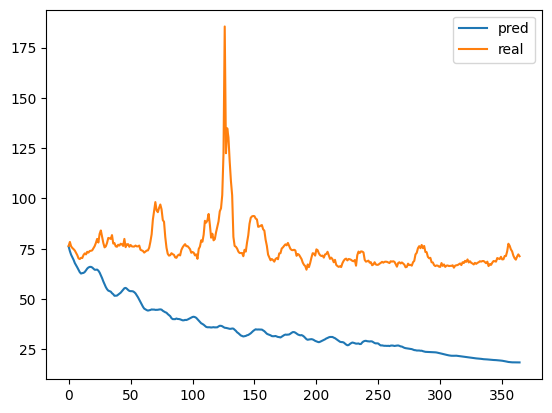

In [ ]:
plt.plot(pred1, label='pred')
plt.plot(y_test, label='real')
plt.legend()

In [ ]:
pred1_2 = make_pred(30, model1)

(300,)
1/1 [==============================] - 0s 82ms/step
(300,)
1/1 [==============================] - 0s 15ms/step
(300,)
1/1 [==============================] - 0s 22ms/step
(300,)
1/1 [==============================] - 0s 15ms/step
(300,)
1/1 [==============================] - 0s 15ms/step
(300,)
1/1 [==============================] - 0s 19ms/step
(300,)
1/1 [==============================] - 0s 14ms/step
(300,)
1/1 [==============================] - 0s 19ms/step
(300,)
1/1 [==============================] - 0s 20ms/step
(300,)
1/1 [==============================] - 0s 18ms/step
(300,)
1/1 [==============================] - 0s 18ms/step
(300,)
1/1 [==============================] - 0s 18ms/step
(300,)
1/1 [==============================] - 0s 17ms/step
(300,)
1/1 [==============================] - 0s 19ms/step
(300,)
1/1 [==============================] - 0s 10ms/step
(300,)
1/1 [==============================] - 0s 14ms/step
(300,)
1/1 [==============================] - 0s 18ms/st

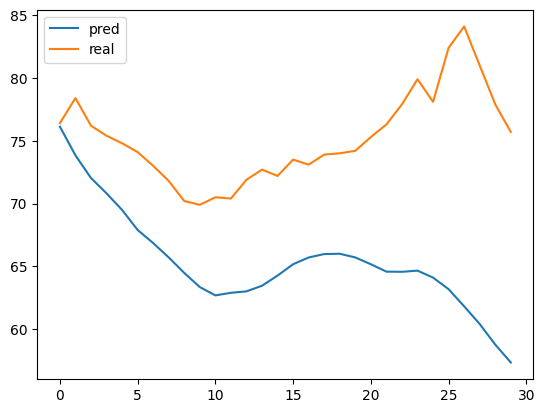

In [ ]:
plt.plot(pred1_2, label='pred')
plt.plot(y_test[:30], label='real')
plt.legend()

In [ ]:
from keras.layers import Dropout

In [ ]:
model2 = Sequential()
# model2.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model2.add(Dense(64, activation='relu', input_dim=X_train.shape[-1]))
model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1))

model2.compile(loss='mse', optimizer='adam', metrics=['mae'])

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 64)                19264     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_36 (Dense)            (None, 4)                 132       
                                                                 
 dense_37 (Dense)            (None, 1)                 5         
                                                                 
Total params: 21,481
Trainable params: 21,481
Non-trai

In [ ]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    verbose=1)

Epoch 1/100
634/634 [==============================] - 2s 2ms/step - loss: 1370.7131 - mae: 25.9099 - val_loss: 1486.3278 - val_mae: 32.4052
Epoch 2/100
634/634 [==============================] - 1s 2ms/step - loss: 718.2921 - mae: 19.0180 - val_loss: 489.6613 - val_mae: 15.9767
Epoch 3/100
634/634 [==============================] - 1s 2ms/step - loss: 514.4517 - mae: 15.9096 - val_loss: 1586.4476 - val_mae: 34.6128
Epoch 4/100
634/634 [==============================] - 1s 2ms/step - loss: 411.7401 - mae: 14.0719 - val_loss: 2308.6353 - val_mae: 42.9890
Epoch 5/100
634/634 [==============================] - 1s 2ms/step - loss: 365.9897 - mae: 13.1754 - val_loss: 2117.8369 - val_mae: 41.1919
Epoch 6/100
634/634 [==============================] - 1s 2ms/step - loss: 336.5195 - mae: 12.5686 - val_loss: 1910.0519 - val_mae: 38.5472
Epoch 7/100
634/634 [==============================] - 1s 2ms/step - loss: 342.4091 - mae: 12.6384 - val_loss: 2496.2798 - val_mae: 45.1232
Epoch 8/100
634/634 

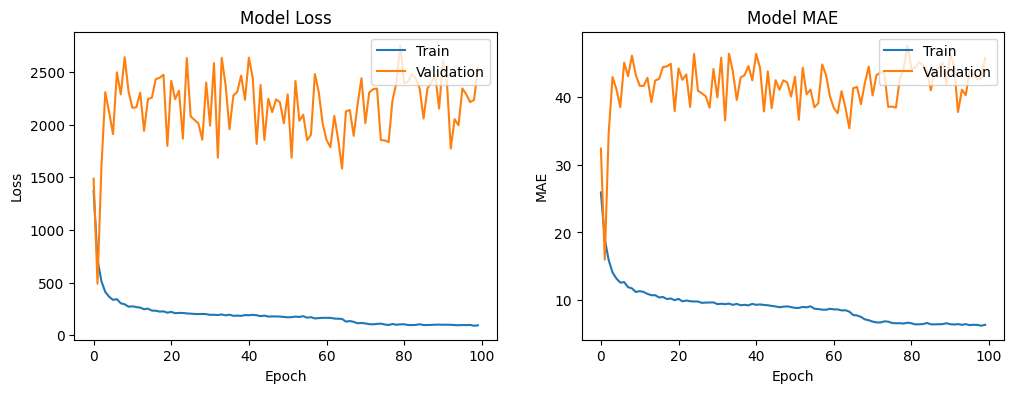

In [ ]:
plot_result(history2)

In [ ]:
pred2_1 = make_pred(30, model2)

(300,)
1/1 [==============================] - 0s 56ms/step
(300,)
1/1 [==============================] - 0s 20ms/step
(300,)
1/1 [==============================] - 0s 20ms/step
(300,)
1/1 [==============================] - 0s 17ms/step
(300,)
1/1 [==============================] - 0s 22ms/step
(300,)
1/1 [==============================] - 0s 22ms/step
(300,)
1/1 [==============================] - 0s 43ms/step
(300,)
1/1 [==============================] - 0s 13ms/step
(300,)
1/1 [==============================] - 0s 12ms/step
(300,)
1/1 [==============================] - 0s 20ms/step
(300,)
1/1 [==============================] - 0s 13ms/step
(300,)
1/1 [==============================] - 0s 16ms/step
(300,)
1/1 [==============================] - 0s 27ms/step
(300,)
1/1 [==============================] - 0s 23ms/step
(300,)
1/1 [==============================] - 0s 17ms/step
(300,)
1/1 [==============================] - 0s 24ms/step
(300,)
1/1 [==============================] - 0s 20ms/st

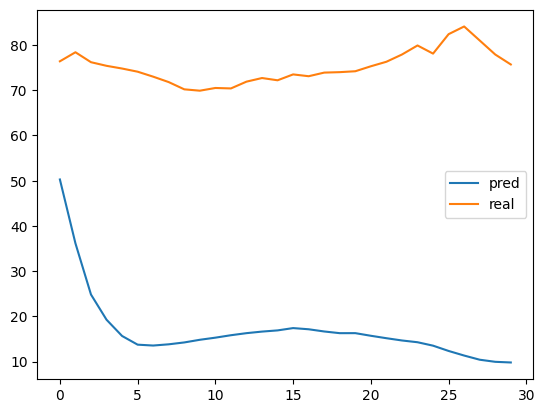

In [ ]:
plt.plot(pred2_1, label='pred')
plt.plot(y_test[:30], label='real')
plt.legend()

In [12]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_dim=X_train.shape[-1]))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(4, activation='relu'))
model3.add(Dense(1))

model3.compile(loss='mse', optimizer='adam', metrics=['mae'])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               38528     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 49169 (192.07 KB)
Trainable params: 4916

In [13]:
history3 = model3.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    verbose=1)

Epoch 1/100
634/634 [==============================] - 5s 5ms/step - loss: 587.6199 - mae: 14.6969 - val_loss: 179.0184 - val_mae: 8.9349
Epoch 2/100
634/634 [==============================] - 2s 3ms/step - loss: 181.2756 - mae: 9.2936 - val_loss: 111.5813 - val_mae: 7.1143
Epoch 3/100
634/634 [==============================] - 2s 3ms/step - loss: 128.0434 - mae: 7.7674 - val_loss: 110.8773 - val_mae: 7.6949
Epoch 4/100
634/634 [==============================] - 2s 3ms/step - loss: 110.8892 - mae: 7.3234 - val_loss: 111.7781 - val_mae: 7.8494
Epoch 5/100
634/634 [==============================] - 2s 3ms/step - loss: 106.4350 - mae: 7.1335 - val_loss: 72.2844 - val_mae: 5.7755
Epoch 6/100
634/634 [==============================] - 2s 3ms/step - loss: 88.7408 - mae: 6.4862 - val_loss: 167.3372 - val_mae: 10.4455
Epoch 7/100
634/634 [==============================] - 3s 5ms/step - loss: 92.4485 - mae: 6.6692 - val_loss: 63.8173 - val_mae: 5.2310
Epoch 8/100
634/634 [======================

KeyboardInterrupt: ignored

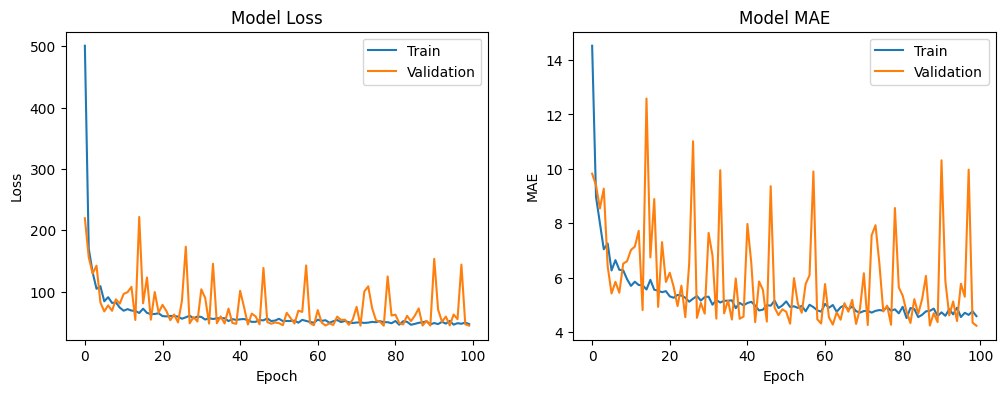

In [ ]:
plot_result(history3)

In [ ]:
t = [i[-1] for i in X_train]

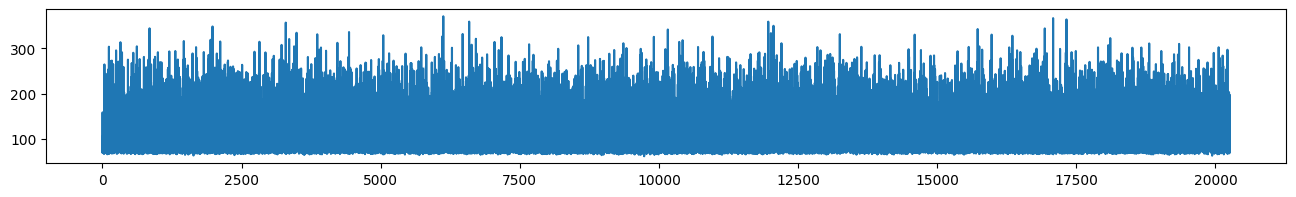

In [ ]:
plt.figure(figsize=(16,2))
plt.plot(t)

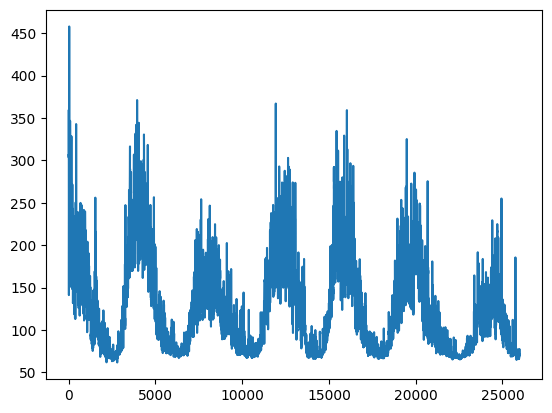

In [ ]:
plt.plot(df['value'].values)

In [ ]:
X_train

array([[ 79.9 ,  80.2 ,  80.4 , ...,  72.5 ,  71.5 ,  70.5 ],
       [ 73.3 ,  72.4 ,  71.7 , ...,  87.9 ,  84.8 ,  87.6 ],
       [133.9 , 133.  , 139.  , ..., 154.1 , 157.7 , 158.8 ],
       ...,
       [120.6 , 127.7 , 136.1 , ..., 178.7 , 179.45, 180.2 ],
       [141.2 , 146.1 , 148.1 , ..., 229.4 , 203.  , 197.7 ],
       [140.4 , 139.2 , 135.8 , ..., 135.9 , 128.3 , 118.3 ]])